# LIMPIEZA Y TRANSFORMACIÓN DE DATOS (PYTHON) - Extracción de Tweets utilizando Apache Kafka

**Contenido:** 

* Presentación
* Carga de datos 
* Limpieza de datos: 
  * Interpretación
  * Limpieza
* Transformación de datos: 
  * Análisis columna por columna
  * Transformación



## **PRESENTACIÓN**

Presentamos el notebook y la metodología de trabajo para este segmento del proyecto. 

* **Limpieza de Datos**

A continuación, se realizarán las tareas de carga, limpieza y transformación de un dataset: **tweets_kafka**.

* **Fuente de los datos**

El dataset se extraerá directamente de MongoDB para ser transformado.

* **Contenido**

El dataset contiene tweets extraídos utilizando Apache Kafka y almacenados en MongoDB. Los mismos fueron filtrados con etiquetas de búsqueda que referencian por igual al [Club Atlético River Plate](https://es.wikipedia.org/wiki/Club_Atl%C3%A9tico_River_Plate). Se podría decir entonces que el dataset contiene tweets sobre River Plate. 


* **¿Qué es Apache Kafka?** 

Apache Kafka es un proyecto de intermediación de mensajes de código abierto que proyecto tiene como objetivo proporcionar una **plataforma unificada, de alto rendimiento y de baja latencia para la manipulación en tiempo real de fuentes de datos.** Puede verse como una cola de mensajes, bajo el patrón publicación-suscripción, masivamente escalable concebida como un registro de transacciones distribuidas,​ lo que la vuelve atractiva para las infraestructuras de aplicaciones empresariales. ([Fuente](https://www.apache.org/))

* **¿Qué es MongoDB?** 

MongoDB (del inglés humongous, "enorme") es un sistema de base de datos NoSQL, orientado a documentos y de código abierto. ([Fuente](https://www.mongodb.com/cloud/atlas/lp/try2?utm_content=controlhterms&utm_source=google&utm_campaign=gs_americas_argentina_search_core_brand_atlas_desktop&utm_term=mongodb&utm_medium=cpc_paid_search&utm_ad=e&utm_ad_campaign_id=12212624305&gclid=CjwKCAjwqeWKBhBFEiwABo_XBtOQ2daSYa3Pfxt0H1kkcajjfWvcH-nLhL9QQMNtaEsRLVCFl_TE2RoCOmgQAvD_BwE))

* **Objetivo**
El objetivo del siguiente proyecto será realizar las tareas de acondicionamiento del dataset, a la vez que se plasma el desarrollo, segmento por segmento y de la forma más clara y concisa posible.

Esto lo haremos: 
  * **Desde el punto de vista técnico y práctico:** Utilizando herramientas y librerías de explotación de datos importados directamente a Python.

  * **Desde el punto de vista expositivo:** Complementando las celdas de código con celdas de texto y comentarios a lo largo  todo el proceso, además de realizar la adecuada división en segmentos del notebook, para mejor seguimiento de la metodología de trabajo. 

* **¿Por qué limpiamos los datos?**

El sentido de este notebook es exhibir la importancia de un buen proceso de limpieza de los datos, los cuales muchas veces llegan al analista con lo que se conoce como "ruido" y espacios en blanco. Un buen proceso de limpieza y transformación es sinónimo de un buen proceso de análisis y visualización posterior.

## **CARGA DE DATOS**

Extraemos los datos e importamos las librerías a utilizar.

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import pymongo
from pymongo import MongoClient
import urllib.parse
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')
sns.set(rc={'axes.facecolor':'darkgray', 'figure.facecolor':'lightgrey'})
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
%matplotlib inline

In [4]:
client = MongoClient()
client.list_database_names()

['admin', 'config', 'local', 'twitter']

* data: DataFrame que contiene los tweets extraídos con Kafka. 


In [5]:
db = client.twitter
collection = db.data
df = pd.DataFrame(list(collection.find()))

In [6]:
df

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,filter_level,lang,timestamp_ms,display_text_range,extended_tweet,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,limit
0,615a051dcf12a556631ae0db,Sun Oct 03 19:31:35 +0000 2021,1.444747e+18,1444746975358955522,RT @RiverLPM: ¿Desde dónde vas a alentar a Riv...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,low,es,1633289495683,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,615a051dcf12a556631ae0dc,Sun Oct 03 19:31:36 +0000 2021,1.444747e+18,1444746976692736020,RT @RinconDeBoca: El que no salta murió en Mad...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,low,es,1633289496001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,615a051dcf12a556631ae0dd,Sun Oct 03 19:31:36 +0000 2021,1.444747e+18,1444746978982776833,"RT @abertini1: Bueno gente, como dice la canci...","<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,low,es,1633289496547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,615a051ecf12a556631ae0de,Sun Oct 03 19:31:36 +0000 2021,1.444747e+18,1444746979750383620,RT @frabigol: Nose si le quedo claro a Vignolo...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,low,es,1633289496730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,615a051ecf12a556631ae0df,Sun Oct 03 19:31:36 +0000 2021,1.444747e+18,1444746979720978437,#CopaOFI A los 19’ Manolo Gómez pone el 1-0 de...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,low,es,1633289496723,"[0, 86]",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93709,615a2dd9cf12a556631c4ee8,Sun Oct 03 22:25:23 +0000 2021,1.444791e+18,1444790713628176385,RT @guadavazquez: Y el aforo? Y el barbijo? Y ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,low,es,1633299923699,NaN,NaN,1.444739e+18,1444739303125491715,{'created_at': 'Sun Oct 03 19:01:06 +0000 2021...,"{'url': 'https://t.co/yedqylPaJ2', 'expanded':...",NaN
93710,615a2dd9cf12a556631c4ee9,Sun Oct 03 22:25:24 +0000 2021,1.444791e+18,1444790715104612354,Nunca vi un bostero con tanta leche en el culo 🤣🤣,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,low,es,1633299924051,NaN,NaN,1.444784e+18,1444784151022944265,{'created_at': 'Sun Oct 03 21:59:19 +0000 2021...,"{'url': 'https://t.co/4hY0SBXNyE', 'expanded':...",NaN
93711,615a2dd9cf12a556631c4eea,Sun Oct 03 22:25:23 +0000 2021,1.444791e+18,1444790712646709253,@Chompiras05 Tengo 10 amigos de boca que me ac...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.444790e+18,1444790121866354688,1.439236e+18,...,low,es,1633299923465,"[13, 140]",{'full_text': '@Chompiras05 Tengo 10 amigos de...,NaN,NaN,NaN,NaN,NaN
93712,615a2dd9cf12a556631c4eeb,Sun Oct 03 22:25:23 +0000 2021,1.444791e+18,1444790713103929348,RT @DamianAvillagra: Boca le ganó 1 de loa últ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,low,es,1633299923574,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **LIMPIEZA DE DATOS**

Para el primer paso del proyecto, realizaremos la limpieza de los datos. Se trabajará en 2 segmentos:

* **Interpretación y descarte.**  
* **Limpieza.**

### INTERPRETACIÓN

Empezamos familiarizándonos con las columnas en los dataset, para entender qué representa cada valor. Esto nos ayudará a evitar caer en un análisis pobre de los datos una vez lleguemos a esa instancia. 

#### **Explicación del paso**

El dataframe listado contiene 23 entries y 38 columnas. 

In [7]:
df.shape

(93714, 38)


Realizaremos, entonces: 

* **Un relevamiento de la presencia de NaN's en las columnas:**
  * ¿Qué porcentaje de NaN's presenta la columna?
  * Dado el porcentaje de NaN's reportado: ¿Hay que eliminar la columna?

* **Una revisión general del contenido de cada columna:** 
  * ¿Qué tipo de variables contienen? 
  * ¿Qué preguntas se podrían llegar a responder con la información de esa columna? 
  * ¿La información que aporta la columna es única dentro del subset o incluso del dataframe? ¿O está contenida en otras columnas?




#### **Relevamiento de NaN's: Implementación**

Generamos una lista que expresa en porcentaje la presencia de NaN's por columna del dataframe. 

In [8]:
missings_tweets = df.isnull().sum() * 100 / len(df)
listado_missing_tweets = pd.DataFrame({'column_name': df.columns,
                                      'missings_tweets': missings_tweets})

listado_missing_tweets.sort_values('missings_tweets', ascending = False, inplace=True)

listado_missing_tweets.head(20)

,column_name,missings_tweets
contributors,contributors,100.000000
coordinates,coordinates,99.997866
geo,geo,99.997866
limit,limit,99.926372
place,place,98.626673
in_reply_to_status_id,in_reply_to_status_id,94.772393
in_reply_to_status_id_str,in_reply_to_status_id_str,94.772393
in_reply_to_screen_name,in_reply_to_screen_name,94.429861
in_reply_to_user_id,in_reply_to_user_id,94.429861
in_reply_to_user_id_str,in_reply_to_user_id_str,94.429861


Parecería ser que las 17 columnas con mayor presencia de NaN's no sirven para trabajar, visualizamos el top 20 para ser más asertivos con la decisión. 

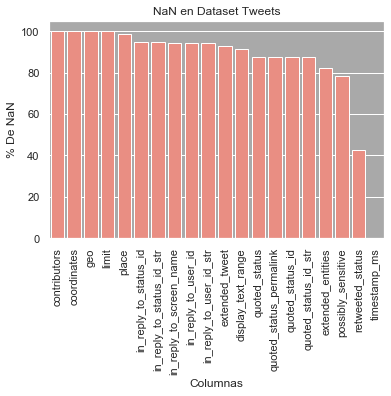

In [9]:
prod_count_basica = pd.DataFrame(listado_missing_tweets.sort_index().head(20))
plt.figure()
sns.barplot(listado_missing_tweets[:20].index, 
            listado_missing_tweets[:20]['missings_tweets'].values, alpha=1, color = 'Salmon')
plt.title('NaN en Dataset Tweets')
plt.ylabel('% De NaN', fontsize=12)
plt.xlabel('Columnas', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Efectivamente, las 17 columnas con mayor presencia de NaN's deberán ser descartadas del trabajo. 

In [8]:
df = pd.DataFrame(df[['_id', 'created_at', 'id', 'id_str', 'text', 'source',
       'truncated', 'user', 
       'quoted_status', 'is_quote_status',
       'quote_count', 'reply_count', 'retweet_count', 'favorite_count',
       'entities', 'favorited', 'retweeted', 'filter_level', 'lang',
       'timestamp_ms', 'retweeted_status']])

df.head(2)

,_id,created_at,id,id_str,text,source,truncated,user,quoted_status,is_quote_status,...,reply_count,retweet_count,favorite_count,entities,favorited,retweeted,filter_level,lang,timestamp_ms,retweeted_status
0,615a051dcf12a556631ae0db,Sun Oct 03 19:31:35 +0000 2021,1.444747e+18,1444746975358955522,RT @RiverLPM: ¿Desde dónde vas a alentar a Riv...,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 1209480151014223872, 'id_str': '1209480...",NaN,False,...,0.0,0.0,0.0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,es,1633289495683,{'created_at': 'Sun Oct 03 19:25:57 +0000 2021...
1,615a051dcf12a556631ae0dc,Sun Oct 03 19:31:36 +0000 2021,1.444747e+18,1444746976692736020,RT @RinconDeBoca: El que no salta murió en Mad...,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 940410625091690503, 'id_str': '94041062...",NaN,False,...,0.0,0.0,0.0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,es,1633289496001,{'created_at': 'Sun Oct 03 18:47:25 +0000 2021...


#### **Revisión de contenido y creación del DataFrame**

Terminada la interpretación de los datos y el primer filtro de columnas, creamos el dataframe del dataset listado, que está formado por las columnas ahora consideradas relevantes. 

In [9]:
df.shape

(93714, 21)

# Finalizada la limpieza, así se ve el dataframe de listados, el cual ahora vamos a llevar al proceso de transformación. 

 * **Consiste de 93.714 entries en 21 columnas.** 
 * **No presenta NaN's.**
 * **Contiene información sobre tweets que contengan las palabras "River" y "Superclásico".** 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93714 entries, 0 to 93713
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _id                        93714 non-null  object 
 1   created_at                 93645 non-null  object 
 2   id                         93645 non-null  float64
 3   id_str                     93645 non-null  object 
 4   text                       93645 non-null  object 
 5   source                     93645 non-null  object 
 6   truncated                  93645 non-null  object 
 7   in_reply_to_status_id      4899 non-null   float64
 8   in_reply_to_status_id_str  4899 non-null   object 
 9   in_reply_to_user_id        5220 non-null   float64
 10  in_reply_to_user_id_str    5220 non-null   object 
 11  in_reply_to_screen_name    5220 non-null   object 
 12  user                       93645 non-null  object 
 13  geo                        2 non-null      obj

In [11]:
df['user']

0        {'id': 1209480151014223872, 'id_str': '1209480...
1        {'id': 940410625091690503, 'id_str': '94041062...
2        {'id': 752261227074752512, 'id_str': '75226122...
3        {'id': 3243936933, 'id_str': '3243936933', 'na...
4        {'id': 4503911837, 'id_str': '4503911837', 'na...
                               ...                        
93709    {'id': 3059356973, 'id_str': '3059356973', 'na...
93710    {'id': 3369553823, 'id_str': '3369553823', 'na...
93711    {'id': 1369329677559623684, 'id_str': '1369329...
93712    {'id': 172921784, 'id_str': '172921784', 'name...
93713    {'id': 1354882934193459203, 'id_str': '1354882...
Name: user, Length: 93714, dtype: object

In [12]:
dfUser = df['user'].apply(pd.Series)

In [13]:
dfUser.columns

Index([                                   0,
                     'contributors_enabled',
                               'created_at',
                          'default_profile',
                    'default_profile_image',
                              'description',
                         'favourites_count',
                      'follow_request_sent',
                          'followers_count',
                                'following',
                            'friends_count',
                              'geo_enabled',
                                       'id',
                                   'id_str',
                            'is_translator',
                                     'lang',
                             'listed_count',
                                 'location',
                                     'name',
                            'notifications',
                 'profile_background_color',
             'profile_background_image_url',
       'pr

In [14]:
dfUser['protected'].value_counts()

False    93645
Name: protected, dtype: int64

In [15]:
dfUser['verified'].value_counts()

False    92419
True      1226
Name: verified, dtype: int64

In [16]:
dfUser['translator_type'].value_counts()

none       89466
regular     4154
badged        25
Name: translator_type, dtype: int64

### Verificadas las columnas con data que puede servir para el analisis posterior. Creo un nuevo DataFrame con las columnas seleccionadas

In [15]:
dfUserFiltrado = dfUser[['id_str','name','screen_name','location','url',
                         'description','verified','followers_count','friends_count','created_at','profile_image_url']]

In [16]:
dfUserFiltrado['created_at'] = pd.to_datetime(dfUserFiltrado['created_at'])
dfUserFiltrado['created_at'] = dfUserFiltrado['created_at'].dt.strftime('%d/%m/%Y')
dfUserFiltrado['created_at'] = pd.to_datetime(dfUserFiltrado['created_at'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [23]:
dfUserFiltrado

,id_str,name,screen_name,location,url,description,verified,followers_count,friends_count,created_at,profile_image_url
0,1209480151014223872,Eye_17⚪❤⚪,Mix1610,in my world,None,AGUANTE RIVER ⚪❤⚪9/12/18🏆🏆🏆🏆\nla musica es vid...,False,75.0,135.0,2019-12-24,http://pbs.twimg.com/profile_images/1278113391...
1,940410625091690503,Iaru,IJures,"Ushuaia, Argentina",None,💙💛💙,False,412.0,266.0,2017-12-12,http://pbs.twimg.com/profile_images/1433457808...
2,752261227074752512,𝕷𝖚𝖈𝖍𝖎𝖙𝖔🚀,16Luchopascua,None,None,http://instagram.com/lucho_pascua,False,316.0,269.0,2016-10-07,http://pbs.twimg.com/profile_images/1417796214...
3,3243936933,Fan de la guepardex,ciruelaferreira,La colimba,None,fan de tally hall y Riquelme estoy infravalora...,False,163.0,492.0,2015-09-05,http://pbs.twimg.com/profile_images/1419371232...
4,4503911837,CANELONES AZULGRANA,CaneAzulgrana,None,http://www.canelonesazulgrana.com/,None,False,2483.0,62.0,2015-12-16,http://pbs.twimg.com/profile_images/1444334396...
...,...,...,...,...,...,...,...,...,...,...,...
93709,3059356973,Glo,TomeoGlo,None,None,None,False,1313.0,1524.0,2015-02-24,http://pbs.twimg.com/profile_images/1437205249...
93710,3369553823,🍕,AlmadaGastton,Loma hermosa,http://www.instagram.com/almadagaston97,#Cosculluela 20/8/17🤴 \n~· De el más grande Ri...,False,544.0,923.0,2015-10-07,http://pbs.twimg.com/profile_images/1434227589...
93711,1369329677559623684,Andy🗿🍀🗿⚗️Astro⚓Tarot🗿⚽,Astro_Futbol14,Argentina buenos aires,https://www.instagram.com/andresito_andy14,Administrativo💻🖥️👔\nAstrología🌕🌠☀️☄️\nTarot🔮🔮\...,False,1097.0,367.0,2021-09-03,http://pbs.twimg.com/profile_images/1442994591...
93712,172921784,Rodrigo Nievas,RodrigoNievas,"Jesús María, Córdoba",None,Periodista @radiojesusmaria / Papá por siempre...,False,1291.0,487.0,2010-07-30,http://pbs.twimg.com/profile_images/8318929520...


In [34]:
dfUserFiltrado['followers_count'] = dfUserFiltrado['followers_count'].fillna(0)
dfUserFiltrado['friends_count'] = dfUserFiltrado['friends_count'].fillna(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
dfUserFiltrado['followers_count'] = dfUserFiltrado['followers_count'].astype(int)
dfUserFiltrado['friends_count'] = dfUserFiltrado['friends_count'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
type(dfUserFiltrado['followers_count'][0])

numpy.int32

In [37]:
dfUserFiltrado.to_csv('userFiltrado.csv')

In [13]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at'] = df['created_at'].dt.strftime('%d/%m/%Y %H:%M:%S')
df['created_at'] = pd.to_datetime(df['created_at'])

In [14]:
df['text'][0]

'RT @RiverLPM: ¿Desde dónde vas a alentar a River hoy? https://t.co/nLohOe7moq'

In [27]:
df["text"].fillna("None", inplace = True)

#### Teniendo la columna formateada correctamente, procedemos a separar los tweets en un intervalo de 5 minutos

In [15]:
df['created_at']

0       2021-03-10 19:31:35
1       2021-03-10 19:31:36
2       2021-03-10 19:31:36
3       2021-03-10 19:31:36
4       2021-03-10 19:31:36
                ...        
93709   2021-03-10 22:25:23
93710   2021-03-10 22:25:24
93711   2021-03-10 22:25:23
93712   2021-03-10 22:25:23
93713   2021-03-10 22:25:24
Name: created_at, Length: 93714, dtype: datetime64[ns]

In [16]:
dataSegmentada5m = df[['created_at', 'text']].resample('5min', on='created_at').text.sum()
dataSegmentada5min = dataSegmentada5m.to_frame().reset_index()
dataSegmentada5min

,created_at,0
0,2021-03-10 19:30:00,RT @RiverLPM: ¿Desde dónde vas a alentar a Riv...
1,2021-03-10 19:35:00,RT @cariverplatecom: Hoy RIVER https://t.co/ET...
2,2021-03-10 19:40:00,¡Solo unos minutos para el #Superclásico en Ar...
3,2021-03-10 19:45:00,"Viste, descargá ahora @PrendeTV y disfrutá del..."
4,2021-03-10 19:50:00,estamos de acuerdo que hay mas de 50 % en la c...
5,2021-03-10 19:55:00,"⚽ Liga Profesional: River vs. Boca\n\n📽 ""Para ..."
6,2021-03-10 20:00:00,"Dalesandro, ¿está en el Monumental viendo a Ri..."
7,2021-03-10 20:05:00,Los hinchas de river saben lo que es alentar? ...
8,2021-03-10 20:10:00,⚽Liga Profesional: River vs. Boca\n\nLos hinch...
9,2021-03-10 20:15:00,¡Arranca el #superclasico!\nElegí el Jugador M...


In [19]:
dataSegmentada5min[0][0]

'RT @RiverLPM: ¿Desde dónde vas a alentar a River hoy? https://t.co/nLohOe7moqRT @RinconDeBoca: El que no salta murió en Madrid canta River. Yo no puedo creerlo. https://t.co/WLjfmTAhYNRT @abertini1: Bueno gente, como dice la canción, dejo todo lo que tengo que hacer y me voy a ver a River PlateRT @frabigol: Nose si le quedo claro a Vignolo lo que piensan en River sobre el.  https://t.co/T0RmklHm2M#CopaOFI A los 19’ Manolo Gómez pone el 1-0 de Wanderers ante River Plate en San José. https://t.co/cafOMzwSCYRT @frabigol: Nose si le quedo claro a Vignolo lo que piensan en River sobre el.  https://t.co/T0RmklHm2MRT @WaruiJohn2: River Plate Vs Boca Junior🔥🔥🔥🔥🔥🔥🔥🔥\nEstadio Monumental\n#SuperclasicoRT @DiarioOle: ⚪️🔴 El aliento de los hinchas de River en la previa al Superclásico con Boca.\n\n📹 @catalinasarra https://t.co/MU0OYiKwcmUy es de River , es x acá.La final del futsal ya me hizo sufrir demasiado, y en media hora es el SuperclasicoRT @frabigol: Nose si le quedo claro a Vignolo lo que 

In [20]:
i=0
for i in range(dataSegmentada5min[0].size):
    dataSegmentada5min[0][i] = dataSegmentada5min[0][i].replace(",","")
    dataSegmentada5min[0][i] = dataSegmentada5min[0][i].replace(".","")
    dataSegmentada5min[0][i] = dataSegmentada5min[0][i].replace(":","")
    dataSegmentada5min[0][i] = dataSegmentada5min[0][i].lower()
    i = i+1
print("Listo")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

Listo


### Teniendo los tweets segmentados por horario podremos realizar analisis mas precisos según los eventos sucedidos en el partido. En este caso exportaremos los segmentos correspondiente a la expulsión de Marcos Rojo y de los goles del partido.

#### Comienzo del partido

In [27]:
dataComienzo = dataSegmentada5min[0][7].split()

In [30]:
dataComienzo = pd.DataFrame(dataComienzo)
dataComienzo.to_csv('dataComienzo.csv')

#### Expulsión de Marcos Rojo (Boca Juniors)

In [32]:
dataRojoExpulsion = dataSegmentada5min[0][10].split()
dataRojoExpulsion = pd.DataFrame(dataRojoExpulsion)
dataRojoExpulsion.to_csv('dataRojoExpulsion.csv')

#### 1er Gol de River

In [33]:
dataGol1River = dataSegmentada5min[0][12].split()
dataGol1River = pd.DataFrame(dataGol1River)
dataGol1River.to_csv('dataGol1River.csv')

#### 2do Gol de River

In [34]:
dataGol2River = dataSegmentada5min[0][27].split()
dataGol2River = pd.DataFrame(dataGol2River)
dataGol2River.to_csv('dataGol2River.csv')

#### 1er Gol de Boca y Final del partido

In [35]:
datagolBocaFin = dataSegmentada5min[0][30].split()
datagolBocaFin = pd.DataFrame(datagolBocaFin)
datagolBocaFin.to_csv('datagolBocaFin.csv')